In [97]:
import pandas as pd
data = pd.read_csv('../data/X_pca.csv')

In [98]:
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4'], dtype='object')

In [99]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [100]:
pca_names = ['PCA 0', 'PCA 1', 'PCA 2', 'PCA 3', 'PCA 4']
data = data.set_axis(labels=pca_names, axis=1)
data.head()

,PCA 0,PCA 1,PCA 2,PCA 3,PCA 4
0,-0.512805,-0.901046,1.259283,-0.674767,0.540957
1,0.116355,-0.802172,0.120996,0.311998,-1.112654
2,1.176250,0.243660,1.759878,0.884328,1.426215
3,-1.088732,-2.103701,1.431497,0.461126,1.944950
4,0.152001,-1.672543,0.100160,-1.046537,-1.080376


In [101]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
data = pd.DataFrame(mms.fit_transform(data), columns=pca_names)

data.describe()

,PCA 0,PCA 1,PCA 2,PCA 3,PCA 4
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,0.419500,0.390591,0.492213,0.480649,0.478123
std,0.108753,0.135026,0.150078,0.152900,0.140191
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346970,0.300069,0.390511,0.376572,0.381106
50%,0.415198,0.387149,0.493442,0.484786,0.475606
75%,0.486074,0.476265,0.592384,0.583179,0.579177
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
import matplotlib.pyplot as plt
import numpy as np

def plot(kmeans, score):
    fig = plt.figure(figsize=(10, 10))
    
    ax = fig.add_subplot(111, projection='3d')
    for c in np.unique(kmeans.labels_):
        elems = data[kmeans.labels_ == c]
        ax.scatter(elems['PCA 0'], elems['PCA 1'], elems['PCA 2'], label=f'Kluster {c}')

    ax.set_xlabel('PCA 0')
    ax.set_ylabel('PCA 1')
    ax.set_zlabel('PCA 2')

    ax.set_title(f'{k} klustera (score: {score})')
    ax.legend()

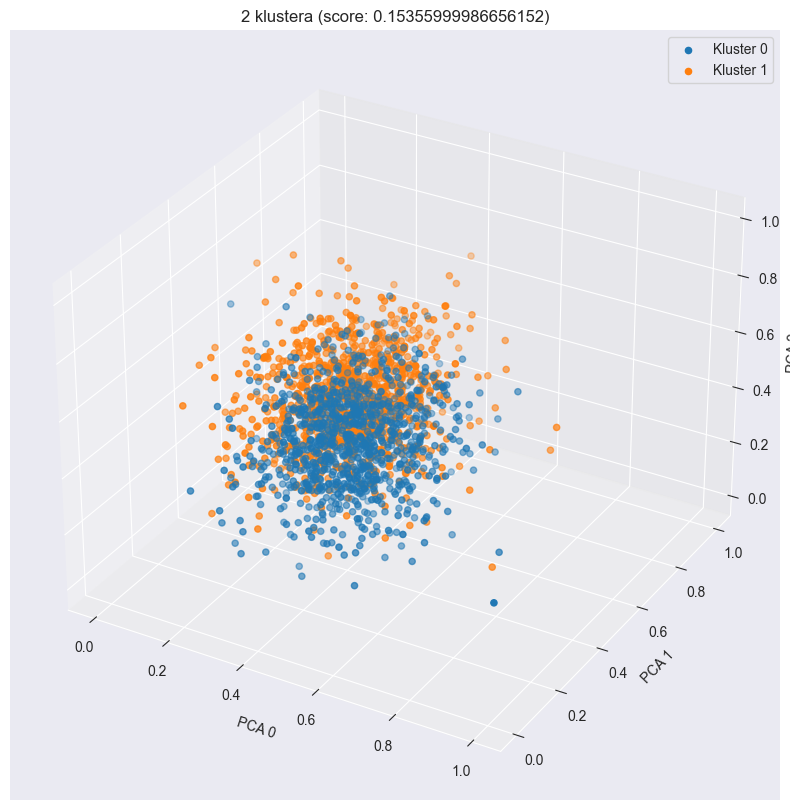

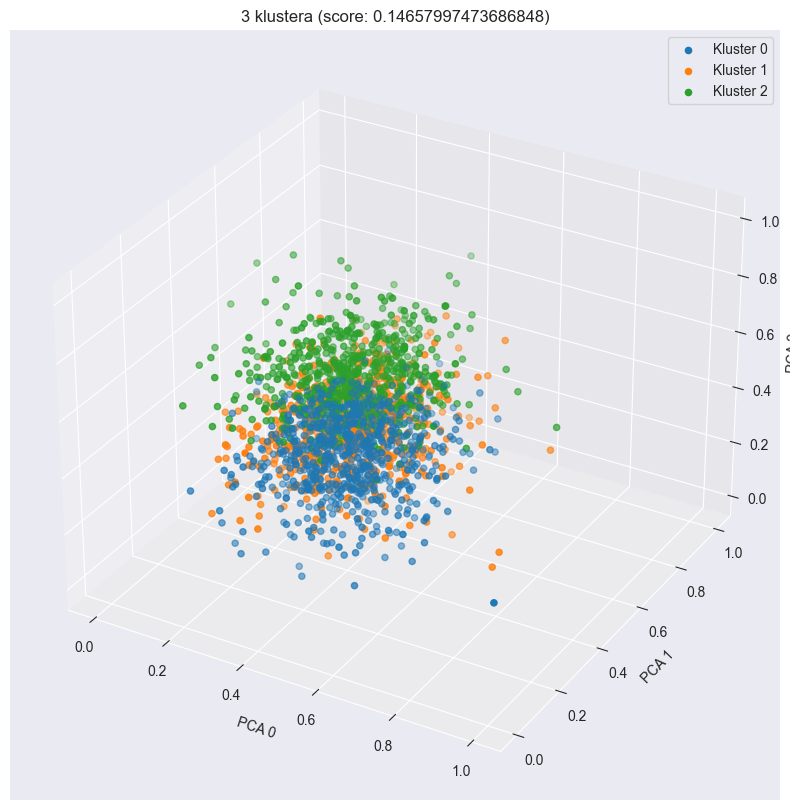

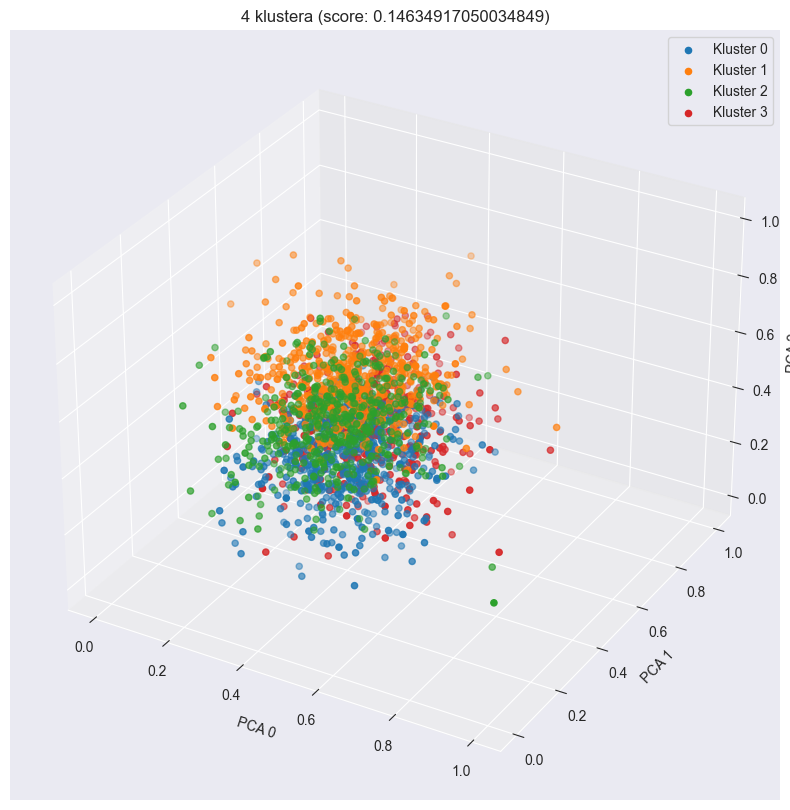

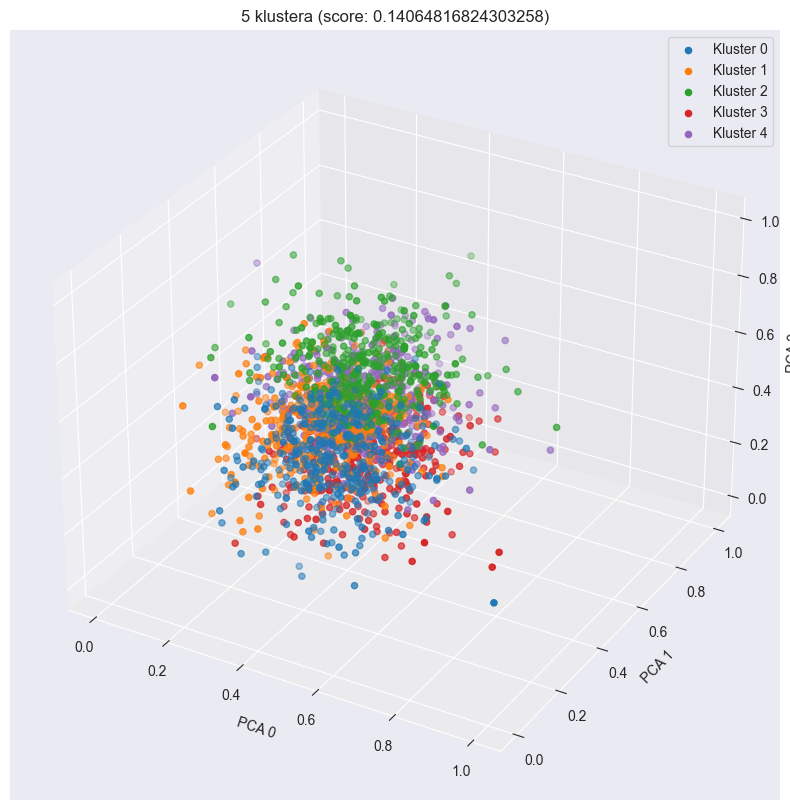

In [103]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

models = []

for k in range(2,6):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    plot(kmeans, score)
    models.append(kmeans)

In [104]:
# Cuvamo najbolji model (sa dve klase)
from helpers import save_model

save_model(models[0], '../../models/kmeans.pkl')